# <font color='Blueviolet'>Import các thư viện cần thiết</font>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

In [96]:
pd.options.mode.chained_assignment = None

In [97]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [98]:
data = pd.read_csv('/kaggle/input/bankmarketing/bank-additional-full.csv', sep=';')

In [99]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# <font color='teal'>Tiền xử lí dữ liệu</font>

#### <font color='mediumaquamarine'>Check null</font>

In [100]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### <font color='mediumaquamarine'>Check duplicate</font>

In [101]:
data.duplicated().sum()

12

In [102]:
data.drop_duplicates(inplace=True)

#### <font color='mediumaquamarine'>Đổi 999 trong cột 'pday' thành 0</font>

In [103]:
data['pdays'] = data['pdays'].replace(999,0)

#### <font color='mediumaquamarine'>Thay yes thành 1 và no thành 0 trong cột 'y'</font>

In [104]:
data = data.replace({'y': {'no': 0, 'yes': 1}})

#### <font color='mediumaquamarine'>Mã hóa các cột định danh</font>

In [105]:
data = pd.get_dummies(data, columns=["job", "marital", "education", "default", "housing", "loan",
"contact", "month", "day_of_week", "poutcome"], drop_first=True)

In [106]:
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


#### <font color='mediumaquamarine'>Chuẩn hóa dữ liệu theo Z-score</font>

In [107]:
scaler = StandardScaler()
data_sc = data.copy().drop(columns='y')
data_y = data['y']
data_scales = scaler.fit_transform(data_sc)
data = pd.DataFrame(data_scales, index=data_sc.index, columns=data_sc.columns)
data['y'] = data_y

In [108]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

# <font color='seagreen'>Trích chọn đặc trưng</font>

In [109]:
X_rfe = data.drop(columns='y')
Y_rfe = data['y']

In [110]:
# feature_selection = data.columns
# for i in range(5):
#     X_train, X_test, y_train, y_test = train_test_split(X_rfe, Y_rfe,test_size=0.2)
    
#     DT = DecisionTreeClassifier()
#     LG = LogisticRegression()
#     RF = RandomForestClassifier()
#     SVM = SVC(kernel="linear")

#     RFE_DT = RFE(DT)
#     RFE_DT.fit(X_train, y_train)
#     col_DT = X_train.columns[RFE_DT.support_]
#     RFE_LG = RFE(LG)
#     RFE_LG.fit(X_train, y_train)
#     col_LG = X_train.columns[RFE_LG.support_]
#     RFE_RF= RFE(RF)
#     RFE_RF.fit(X_train, y_train)
#     col_RF = X_train.columns[RFE_RF.support_]
#     RFE_SVM= RFE(SVM)
#     RFE_SVM.fit(X_train, y_train)
#     col_SVM = X_train.columns[RFE_SVM.support_]

#     common_values_in_all = list(set.intersection(*map(set, [col_DT, col_LG, col_RF, col_SVM])))

#     feature_selection = list(set.intersection(*map(set, [feature_selection, common_values_in_all])))

In [111]:
feature_selection = ['campaign',
                     'cons.conf.idx',
                     'day_of_week_wed',
                     'duration',
                     'education_university.degree',
                     'cons.price.idx',
                     'job_blue-collar',
                     'euribor3m']

In [112]:
# feature_selection

### <font color='seagreen'>Chọn biến X (train) và Y (target)</font>

In [113]:
X = data[feature_selection]
Y = data["y"]

### <font color='seagreen'>Chia dữ liệu thành 2 tập train, test (80:20)</font>

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# <font color='steelblue'>Xây dựng mô hình</font>

In [115]:
list_model = []

#### <font color='blue'>KNN</font>

In [116]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
k_toi_uu = error.index(min(error)) + 1
print("Minimum error:-",min(error),"at K =", k_toi_uu)

Minimum error:- 0.09652744050509957 at K = 9


In [117]:
knn = KNeighborsClassifier(n_neighbors = k_toi_uu)
list_model.append(knn)

#### <font color='blue'>Logistic Regression</font>

In [118]:
lr = LogisticRegression()
list_model.append(lr)

#### <font color='blue'>Random Forest</font>

In [119]:
rf = RandomForestClassifier()
list_model.append(rf)

#### <font color='blue'>Naive Bayes</font>

In [120]:
nb = GaussianNB()
list_model.append(nb)

#### <font color='blue'>Neural Network</font>

In [121]:
mlp = MLPClassifier()
list_model.append(mlp)

#### <font color='blue'>SVC</font>

In [122]:
svm = SVC()
list_model.append(svm)

# <font color='green'>Đánh giá mô hình</font>

,Model name,Accuracy (%),Precision,Recall,F1-score
1,Neural Network,90.82,0.63,0.53,0.57
2,KNN,90.35,0.62,0.48,0.54
3,SVC,90.23,0.65,0.38,0.48
4,Logistic Regression,90.00,0.64,0.34,0.44
5,Random Forest,89.30,0.55,0.49,0.52
6,Naive Bayes,87.93,0.49,0.47,0.48


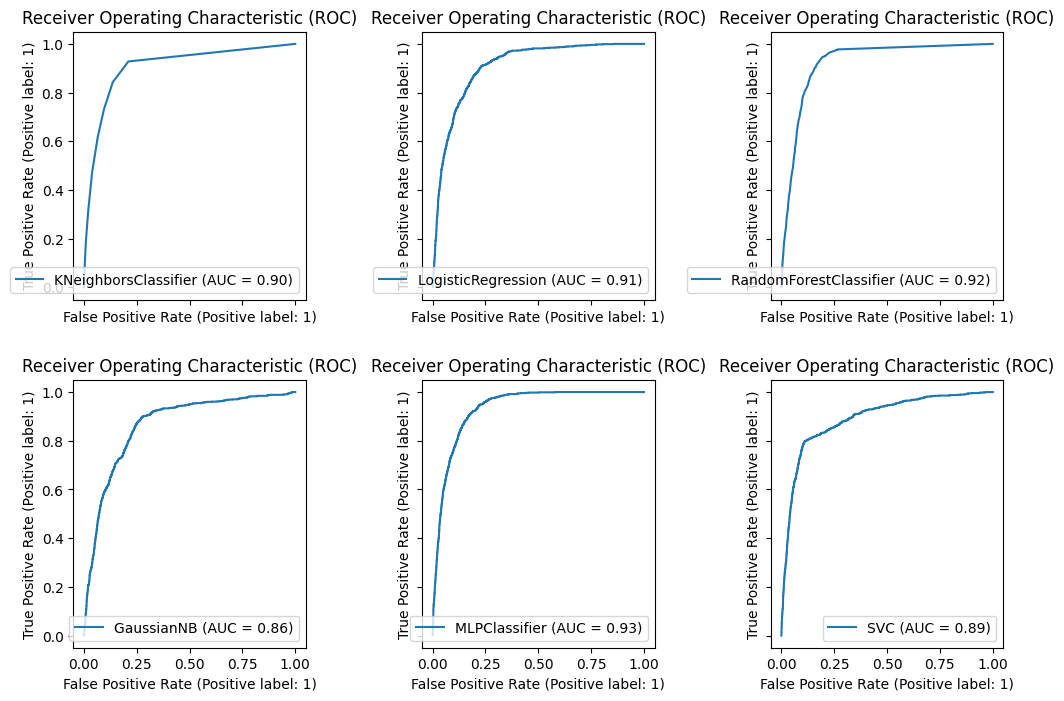

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True, sharex=True, dpi=100, gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

model_eval = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model, ax in zip(list_model, axes.flatten()):
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    ax.set(title="Receiver Operating Characteristic (ROC)")
    
    model_eval.append(eval_dict)

model_eval = pd.DataFrame(model_eval).sort_values('Accuracy (%)', ascending=False)
model_eval.reset_index(drop=True, inplace=True)
model_eval.index +=1
model_eval

# <font color='green'>Sử dụng K fold cross validation</font>

In [124]:
KF = KFold(n_splits = 10, shuffle=True, random_state=1)

In [125]:
model_eval_k = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

scoring = ['accuracy', 'precision', 'recall', 'f1']

for model in list_model:
    eval_dict = {}
    eval_dict['Model name (kFold)'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    results = cross_validate(estimator=model, X=X, y=Y, cv=KF, scoring=scoring)
    
    # Model accuracy
    eval_dict['Accuracy (%)'] = round(results['test_accuracy'].mean(), 4)*100
    
    # Model precision
    eval_dict['Precision'] = round(results['test_precision'].mean(), 2)
    
    # Modell recall
    eval_dict['Recall'] = round(results['test_recall'].mean(), 2)

    # Model F1 score
    eval_dict['F1-score'] = round(results['test_f1'].mean(), 2)
    
    model_eval_k.append(eval_dict)
    
model_eval_k = pd.DataFrame(model_eval_k).sort_values('Accuracy (%)', ascending=False)
model_eval_k.reset_index(drop=True, inplace=True)
model_eval_k.index +=1
model_eval_k

,Model name (kFold),Accuracy (%),Precision,Recall,F1-score
1,Neural Network,90.93,0.62,0.50,0.55
2,SVC,90.73,0.65,0.38,0.48
3,KNN,90.69,0.61,0.49,0.54
4,Logistic Regression,90.49,0.65,0.34,0.44
5,Random Forest,90.14,0.57,0.51,0.54
6,Naive Bayes,88.49,0.49,0.48,0.48


In [126]:
model_eval

,Model name,Accuracy (%),Precision,Recall,F1-score
1,Neural Network,90.82,0.63,0.53,0.57
2,KNN,90.35,0.62,0.48,0.54
3,SVC,90.23,0.65,0.38,0.48
4,Logistic Regression,90.00,0.64,0.34,0.44
5,Random Forest,89.30,0.55,0.49,0.52
6,Naive Bayes,87.93,0.49,0.47,0.48


# <font color='green'>So sánh train test 80-20 và kfold</font>

In [127]:
difference = pd.DataFrame(model_eval['Model name'])
difference

,Model name
1,Neural Network
2,KNN
3,SVC
4,Logistic Regression
5,Random Forest
6,Naive Bayes


In [128]:
difference["Dif_Accuracy"] = model_eval_k["Accuracy (%)"] - model_eval["Accuracy (%)"]
difference["Dif_Precision"] = model_eval_k["Precision"] - model_eval["Precision"]
difference["Dif_Recall"] = model_eval_k["Recall"] - model_eval["Recall"]
difference["Dif_F1-score"] = model_eval_k["F1-score"] - model_eval["F1-score"]

In [129]:
def format_value(val):
    condition = (val > 0) 
    font_color = 'green' if condition else 'black'
    font_weight = 'bold' if condition else 'normal'
    return 'color: {}; font-weight: {}'.format(font_color, font_weight)
difference.style.applymap(format_value, subset=["Dif_Accuracy", "Dif_Precision", "Dif_Recall", "Dif_F1-score"])

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
1,Neural Network,0.110000,-0.010000,-0.030000,-0.020000
2,KNN,0.380000,0.030000,-0.100000,-0.060000
3,SVC,0.460000,-0.040000,0.110000,0.060000
4,Logistic Regression,0.490000,0.010000,0.000000,0.000000
5,Random Forest,0.840000,0.020000,0.020000,0.020000
6,Naive Bayes,0.560000,0.000000,0.010000,0.000000


In [130]:
difference.style.applymap(lambda x: "background-color: red" if x<0 else "background-color: white",
subset=["Dif_Accuracy", "Dif_Precision", "Dif_Recall", "Dif_F1-score"])

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
1,Neural Network,0.110000,-0.010000,-0.030000,-0.020000
2,KNN,0.380000,0.030000,-0.100000,-0.060000
3,SVC,0.460000,-0.040000,0.110000,0.060000
4,Logistic Regression,0.490000,0.010000,0.000000,0.000000
5,Random Forest,0.840000,0.020000,0.020000,0.020000
6,Naive Bayes,0.560000,0.000000,0.010000,0.000000
